In [1]:
from flashbax.vault import Vault
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

v = Vault(
    vault_name="jax_party",
    vault_uid="20250206195311",
)
buffer_state = v.read()

Loading vault found at /mnt/c/Users/ryanp/OneDrive/Documents/Jax-Party/vaults/jax_party/20250206195311


In [2]:
buffer_state.experience["action"].shape

(64, 15616, 3)

In [3]:
actions = buffer_state.experience["action"]
rewards = buffer_state.experience["reward"]

In [4]:
action_sum_per_agent = actions.reshape((-1, 3)).sum(axis=0)
action_sum_per_agent

Array([611392, 610833, 611559], dtype=int32)

[1246144. 1399204. 1529479.]


<BarContainer object of 3 artists>

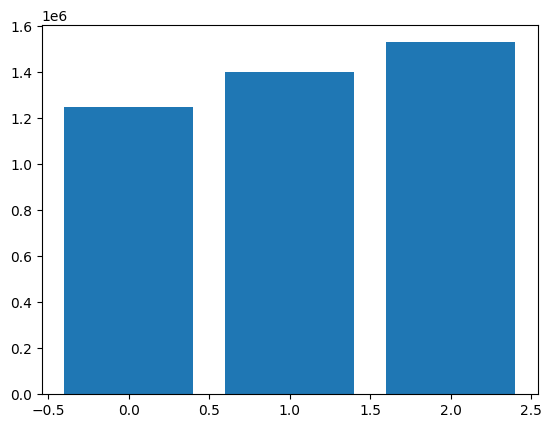

In [5]:
rewards_sum_per_agent = rewards.reshape((-1, 3)).sum(axis=0)
print(rewards_sum_per_agent)
plt.bar(jnp.arange(3), rewards_sum_per_agent)

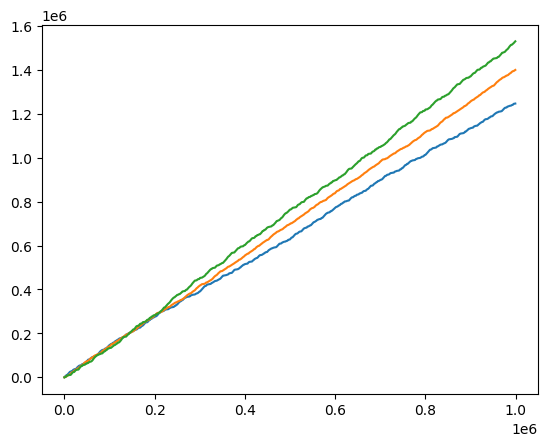

In [12]:
plt.plot(rewards.reshape((-1, 3)).cumsum(0))